# EDA
### train dataframe
- 경로 : `./input/data/train/train.csv`
- 컬럼 : id, gender, race, age, path(사진파일)
    - 성별 분포 
    - 나이대 분포 

### images 폴더
- 경로 : `./input/data/train/images/폴더(train dataframe의 path컬럼)/사진7개`
- 레이블링 : incorrect_mask, normal, 나머지(정상)
    - 정상, incorrect, normal 분포


---

## 최종 class 18개
1. Mask : Wear, Incorrect, Not Wear (3개)
2. Gender : Male, Female            (2개)
3. Age : <30, >=30 and <60, >=60    (3개)


In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [35]:
train_dataframe = '../input/data/train/train.csv'

df = pd.read_csv(train_dataframe)
# df.head()

In [36]:
# 30살과 60살 기준으로 나이대 범위 구분 (3개)
# 청년, 중년, 장년으로 구분
def get_age_range(age):
    if age < 30:
        return "young"
    elif age >= 30 and age < 60:
        return "middle"
    elif age >= 60:
        return "old"

df['age_range'] = df['age'].apply(lambda x : get_age_range(x))

남여 비율
 female    0.614074
male      0.385926
Name: gender, dtype: float64


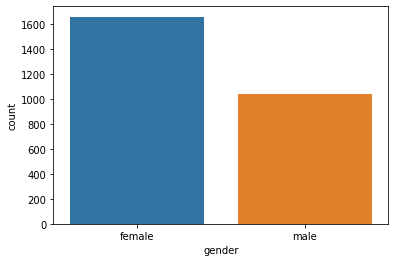

In [37]:
# gender 분포
sns.countplot(data=df, x='gender')
print('남여 비율\n', df.gender.value_counts(1))

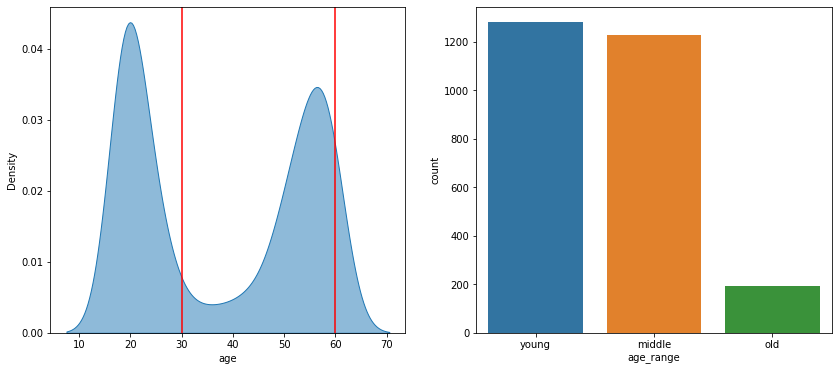

In [45]:
plt.figure(figsize=(14,6))

# Age 분포 확인
plt.subplot(1,2,1)
sns.kdeplot(data=df, x='age', fill=True, alpha=0.5)

# 30살과 60살에 기준선 추가
plt.axvline(30, c='red')
plt.axvline(60, c='red')

# Age range 분포 확인
plt.subplot(1,2,2)
sns.countplot(data=df, x='age_range', order=df.age_range.value_counts().index)

plt.show()

- 30살 이상 60살 미만인, middle age range 데이터가 가장 많지만, 실제 분포를 확인해보면 30대와 40대가 거의 없다는 것을 알 수 있다.
- 또한 60살 이상의 old 데이터가 매우 부족함

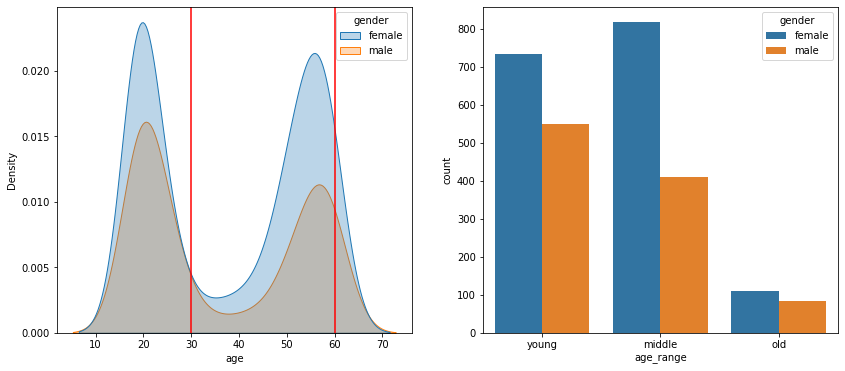

In [46]:
plt.figure(figsize=(14,6))

# 남자와 여자 구분해서, 나이대 분포 확인
plt.subplot(1,2,1)
sns.kdeplot(data=df, x='age', hue='gender', fill=True, alpha=0.3)

# 30살과 60살에 기준선 추가
plt.axvline(30, c='red')
plt.axvline(60, c='red')

# 남녀 구분해서, age_range 분포 확인
plt.subplot(1,2,2)
sns.countplot(data=df, x='age_range', hue='gender', order=df.age_range.value_counts().index)


- 대체로 여성 데이터가 더 많다는 것을 볼 수 있고, 특히 중년층에서는 남녀비율이 2배 정도 차이가 난다.

## 이미지 시각화
- train dataframe의 path 컬럼이 (ex. '0000001_female_Asian_45) 실제 이미지 데이터들의 폴더명이다.
- 각 폴더마다 이미지 사진 7개(정상 5개, incorrect 1개, normal 1개)가 들어있다.
- 하지만, `._` 으로 시작하는 이미지 파일 7개가 있기 때문에 해당 데이터들은 제거하거나 필터링을 거친다.

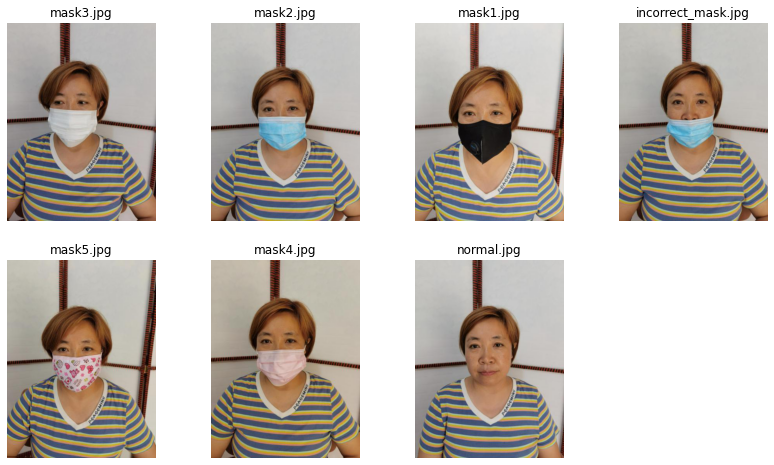

In [81]:
# 이미지 폴더들 디렉토리 위치
img_folder_path = '../input/data/train/images/'

# 샘플로 train dataframe 첫번째 행의 path 컬럼을 가져옴
sample_path = df.path[0]

# sample_img_path : 실제 이미지 데이터가 있는 경로
sample_img_path = os.listdir(os.path.join(img_folder_path, sample_path))
# sample_img_path

# # '._'로 시작하는 파일은 필터링 거쳐서 진짜 필요한 7개 데이터만 가져옴 -> sample_img_path_real append함
sample_img_path_real = []
for i in sample_img_path:
    if '._' not in i:
        sample_img_path_real.append(i)
# sample_img_path_real

# 샘플 이미지 7개를 plt로 시각화
plt.figure(figsize=(14,8))
for idx, i in enumerate(sample_img_path_real):
    plt.subplot(2, 4, idx+1)
    imgs = os.path.join(img_folder_path, sample_path, i)

    image_pil = Image.open(imgs)
    image = np.array(image_pil)

    plt.imshow(image)
    plt.title(i)
    plt.axis('off')


### 정상, incorrect, normal 분포 차이
- 이미지를 흑백이미지(1차원)으로 변환하고
- 픽셀 값(0 ~ 255) 들의 분포(빈도)를 확인할 수 있다
- (옵션) 중간에 img.crop을 사용해서 얼굴 부분만 가져옴

In [ ]:
import random
# 샘플 이미지 폴더 선택
sample_list = [i for i in os.listdir('../input/data/train/images/') if '._' not in i]
sample_folder = sample_list[random.randint(0, len(sample_list))]
image_names1 = ['mask1.jpg','mask2.jpg','mask3.jpg','mask4.jpg','mask5.jpg']
image_names2 = ['incorrect_mask.jpg','normal.jpg']


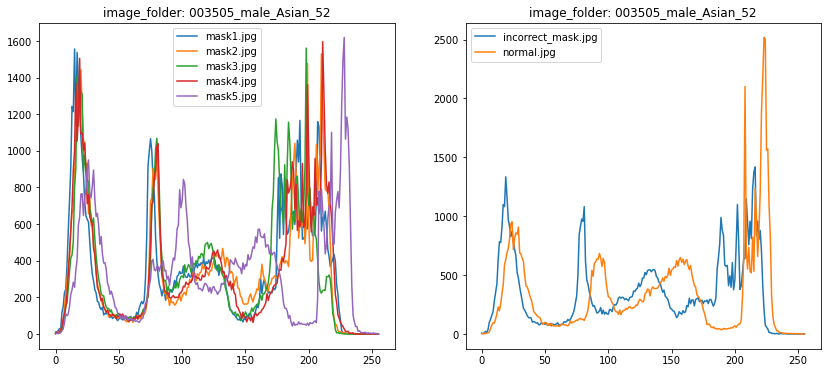

In [242]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
for i in image_names1:
    # convert('L')을 사용하면 흑백 이미지로 출력할 수 있음
    img = Image.open(f'../input/data/train/images/{sample_folder}/{i}').convert('L')

    img = img.crop((50,50,300,400)) # centercrop 역할 수행
    img = np.array(img)

    hist, bin_edge = np.histogram(img, bins=256, range=(0,255))
    sns.lineplot(data=hist)

plt.title(f'image_folder: {sample_folder}')
plt.legend(image_names1)

plt.subplot(1,2,2)
for i in image_names2:
    # convert('L')을 사용하면 흑백 이미지로 출력할 수 있음
    img = Image.open(f'../input/data/train/images/{sample_folder}/{i}').convert('L')

    img = img.crop((50,50,300,400)) # centercrop 역할 수행
    img = np.array(img)

    # np.histogram으로 반환값이 빈도수와, 막대 위치점이 나온다.
    # 아래 코드에서 bins=256을 했기 때문에 픽셀값 0부터 255까지의 빈도수가 hist 변수에 할당됨
    hist, bin_edge = np.histogram(img, bins=256, range=(0,255))

    # lineplot을 통해 어떤 픽셀값이 제일 빈도수가 높은지 알 수 있다
    sns.lineplot(data=hist)

plt.title(f'image_folder: {sample_folder}')
plt.legend(image_names2)

plt.show()

### Class(18개)별로 데이터 분포 확인

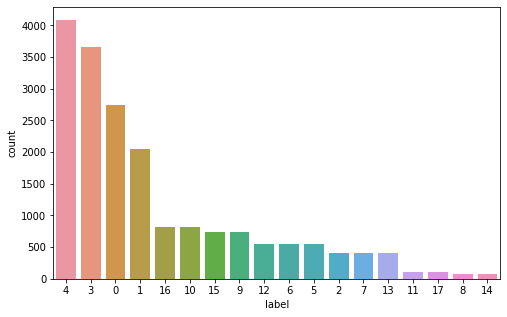

In [158]:
df = pd.read_csv('train_label.csv')
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', order = df['label'].value_counts().index)
plt.show()

Class간 이미지 픽셀 값 데이터 분포

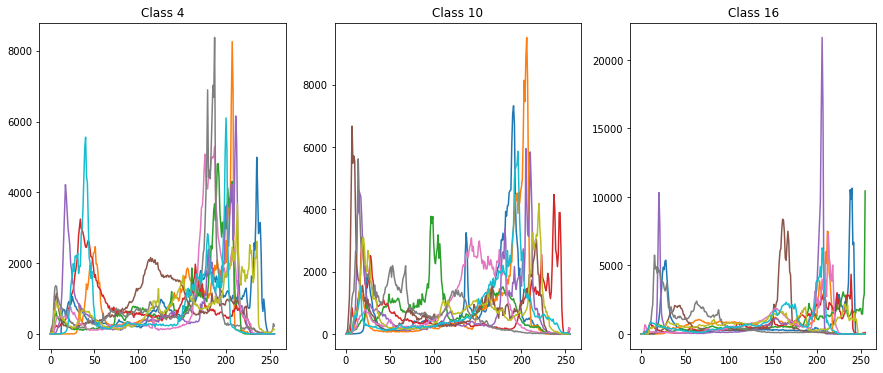

In [234]:
first_class = df[df['label'] == 0].loc[:, 'path'].tolist()
random.shuffle(first_class)
second_class = df[df['label'] == 6].loc[:, 'path'].tolist()
random.shuffle(second_class)
third_class = df[df['label'] == 12].loc[:, 'path'].tolist()
random.shuffle(third_class)

N = 0

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
for i in first_class[N:N+10]:
    img = Image.open(i).convert('L')
    hist, bin_edge = np.histogram(img, bins=256, range=(0,255))
    sns.lineplot(data=hist)
    plt.title('Class 4')

plt.subplot(1,3,2)
for i in second_class[N:N+10]:
    img = Image.open(i).convert('L')
    hist, bin_edge = np.histogram(img, bins=256, range=(0,255))
    sns.lineplot(data=hist)
    plt.title('Class 10')

plt.subplot(1,3,3)
for i in third_class[N:N+10]:
    img = Image.open(i).convert('L')
    hist, bin_edge = np.histogram(img, bins=256, range=(0,255))
    sns.lineplot(data=hist)
    plt.title('Class 16')

plt.show()